<a href="https://colab.research.google.com/github/raghav5102/Digital-Image-Processing-Project/blob/main/FaceDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Mask Detection Using Python and OpenCV

In [1]:
#Importing Neccessary Libraries

import numpy as np
import pandas as pd  
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
#DataSet Containg Proper Mask Wearing Faces
propermask_data = ['proper_1.jpg','proper_2.jpg','proper_3.jpg','proper_4.jpg','proper_5.jpg','proper_6.jpg'] 

In [3]:
#DataSet Containg ImProper Mask Wearing Faces
impropermask_data = ['improper_1.jpg','improper_2.jpg','improper_3.jpg','improper_4.jpg','improper_5.jpg','improper_6.jpg']

In [4]:
#DataSet Containg No Mask Wearing Faces
nomask_data = ['no_1.jpg','no_2.jpg','no_3.jpg','no_4.jpg','no_5.jpg','no_6.jpg']

In [5]:
#Haar Cascade Classifier for Face Detection
haar_data = cv2.CascadeClassifier('data.xml')    

In [6]:
#Detecting Faces for No mask Wearing pictures
no_data = []
for o_img in nomask_data:
    img = cv2.imread(o_img)

    # Convert BGR image To Gray Scale For better Result
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Use Averaging Filter for Smoothing of images
    avg_img = cv2.blur(gray_img,(1,1))
     
    
    faces = haar_data.detectMultiScale(avg_img)
    for (x,y,w,h) in faces:
        cv2.rectangle(avg_img,(x,y),(x+w,y+h),(255,0,0),2)
        face = avg_img[y:y+h , x:x+w]
        face = cv2.resize(face,(100,100))
        no_data.append(face)

In [7]:
proper_data = []
for o_img in propermask_data:
    img = cv2.imread(o_img)
    # Convert BGR image To Gray Scale For better Result
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Use Averaging Filter for Smoothing of images
    avg_img = cv2.blur(gray_img,(1,1))
    
    train_img = cv2.resize(avg_img,(100,100))
    proper_data.append(train_img)


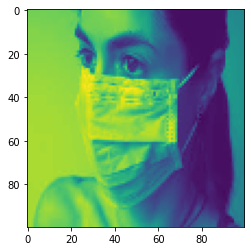

In [8]:
#Example 
plt.imshow(proper_data[0])

In [9]:
improper_data = []
for o_img in impropermask_data:
    img = cv2.imread(o_img)
    
    # Convert BGR image To Gray Scale For better Result
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Use Averaging Filter for Smoothing of images
    avg_img = cv2.blur(gray_img,(1,1))
    
    train_img = cv2.resize(avg_img,(100,100))
    improper_data.append(train_img)

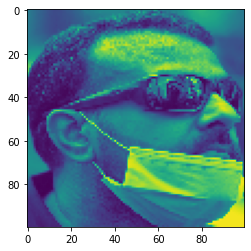

In [10]:
#Example
plt.imshow(improper_data[0])

In [11]:
#Save the list in .npy for future reference
np.save('WITH_MASk.npy',proper_data)
np.save('Improper_mask.npy',improper_data)
np.save('No_mask.npy',no_data)

In [12]:
#Load the list 
with_mask = np.load('WITH_MASk.npy')
improper_mask = np.load('Improper_mask.npy')
no_mask = np.load('No_mask.npy',allow_pickle = True)

In [13]:
#Reshape the images in 2-D to train the model

with_mask = with_mask.reshape(6,100*100)           

improper_mask = improper_mask.reshape(6,100*100)

no_mask = no_mask.reshape(6,100*100)

In [14]:
# Make Training Dataset by Concatenate the List
X_train = np.r_[with_mask,improper_mask,no_mask]
X_train.shape

(18, 10000)

In [15]:
#Labeling The Images to form y_train
y_train = np.zeros(X_train.shape[0])
y_train[:6] = 2
y_train[6:12] = 1
y_train[12:] = 0

In [16]:
#Using Prinicipal Component Analysis Technique to reduce the Dimensionalty of Images
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train) 

In [17]:
#Example
X_train[0]

array([-622.83983926, 5252.59019907, 1002.32535311])

In [18]:
#Using RandomForestClassifier Algorithm for training the model
clf = RandomForestClassifier(n_estimators = 500)

#Fitting The Model
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
#Creating Test DataSet
test_set = ['test_1.jpg','test_2.jpg','test_3.jpg']

In [20]:
test_data = []
for o_img in test_set:
    img = cv2.imread(o_img)
    
    # Convert BGR image To Gray Scale For better Result
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Use Averaging Filter for Smoothing of images
    avg_img = cv2.blur(gray_img,(1,1))


    test_img = cv2.resize(avg_img,(100,100))
    test_data.append(test_img)

In [21]:
#Save and Unload test data
np.save('test.npy',test_data)
test_mask = np.load('test.npy',allow_pickle = True)

In [22]:
#Reshape Test Data same as Training Data
test_mask = test_mask.reshape(3,100*100)

In [23]:
#PCA transformation for Test Dataset
test_mask = pca.transform(test_mask)

In [24]:
for i in range(0,3):
  prediction = clf.predict(test_mask)[i]
  if(prediction == 2.0):
    print('Proper Mask')
  elif(prediction == 1.0):
    print('Improper Mask')
  else:
    print('No Mask')

Improper Mask
Proper Mask
No Mask
